# **Import libraries**

In [8]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
from MRD import add_noise_artifacts

import MRD
import os
import re
import numpy as np
# from skimage.measure import compare_ssim, compare_psnr


import matplotlib.pyplot as plt
from tqdm import tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset path
###  **  SOS - Correct the path in the MRD package 

In [10]:
rootPathMRD = 'O:\\Projects & users applications\\Denoise\\Dataset\\MRDtest\\' # dataset path

# Upload original MRD file  

In [11]:
# Get Subject and Scan ID

current_directory = os.path.dirname(rootPathMRD)
print(current_directory)
scan_ids = []
subject_ids = []

for path, dirs, files in os.walk(current_directory):
    if len(dirs) == 0:
        for file in files:
            if re.search("\.(MRD)$", file):
                scan_id_i = os.path.basename(path)
                scan_ids.append(scan_id_i)
                subject_id_i = os.path.basename(os.path.normpath(path + os.sep + os.pardir))
                subject_ids.append(subject_id_i)


O:\Projects & users applications\Denoise\Dataset\MRDtest


In [12]:
print(np.shape(subject_ids))
print(np.shape(scan_ids))

print(subject_ids)
print(scan_ids)

(6,)
(6,)
['1285', '1344', '1344', '1344', '1344', '1344']
['17874', '18774', '18815', '18856', '18861', '18862']


In [13]:
# get MRD file
def get_mrd(subject_ids=None,scan_ids=None):
    im_file = []
    k_space_file = []
    for i in tqdm(range(0,len(scan_ids))):
        mouse_id = subject_ids[i]
        scan_id = scan_ids[i]
        try:
            [k_space, im ]= MRD.recon_mrd_fse2d(mouse_id=mouse_id, scan_id=scan_id)
            for slice in range(1,np.shape(im)[0]):
                im_slice = im[slice,:,:]
                im_slice.resize(256,256) # resize the data to have the same length
                k_space_slice = k_space[slice,:,:]
                k_space_slice.resize(256,256) # resize the data to have the same length

                im_file.append(im_slice)
                k_space_file.append(k_space_slice)
        except (TypeError,IndexError,ValueError,KeyError,EOFError):
            # print('Error' + mouse_id + scan_id )
            pass
            
    return im_file, k_space_file

In [14]:
# load all the availbale MRD file
im_file = []
k_space_file = []
im_file, k_space_file = get_mrd(subject_ids=subject_ids,scan_ids=scan_ids) 

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1285\17874\17874


 17%|██████████████                                                                      | 1/6 [00:04<00:21,  4.40s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18774\18774


 33%|████████████████████████████                                                        | 2/6 [00:05<00:10,  2.61s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18815\18815


 50%|██████████████████████████████████████████                                          | 3/6 [00:08<00:08,  2.67s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18856\18856


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:11<00:05,  2.64s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18861\18861


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:13<00:02,  2.71s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18862\18862


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.81s/it]


In [15]:
# store into numpy array
k_space_file = np.array(k_space_file)
im_file = np.array(im_file)
print(im_file.shape)
print(k_space_file.shape)

(49, 256, 256)
(49, 256, 256)


# Plot Original file

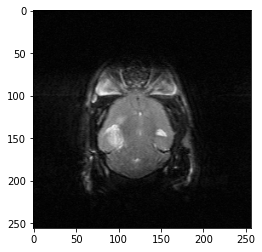

In [16]:
ind = 20
ks_test = k_space_file[ind,:,:]
im_test = MRD.recon_corrected_kspace(corrected_kspace=ks_test)
plt.imshow(im_test, cmap='gray')

Original Image


<ipython-input-17-c427b42553d7>:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_file[ind,:,:])), cmap='gray')


(-0.5, 255.5, 255.5, -0.5)

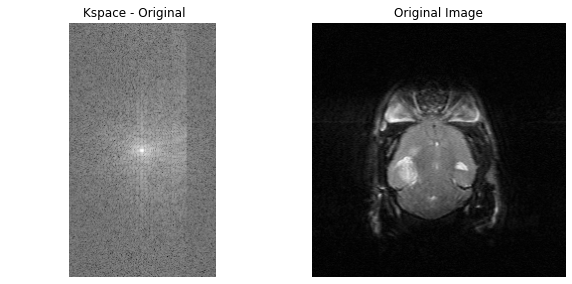

In [17]:
# Plot Original Image

plt.figure(figsize=(10, 10))
print('Original Image')
plt.subplot(121)
plt.title("Kspace - Original")
plt.imshow(np.log(abs(k_space_file[ind,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

(10, 256, 256)
MB3D Filter


(-0.5, 255.5, 255.5, -0.5)

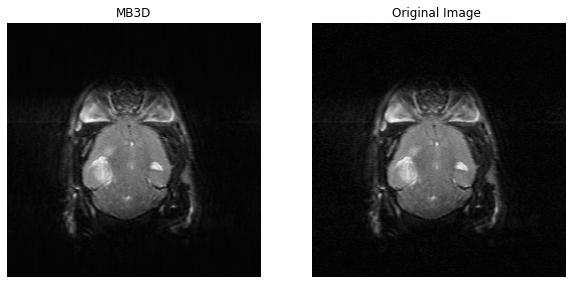

In [11]:
import MRD 
im = np.zeros((10,np.shape(k_space_file)[1],np.shape(k_space_file)[2]))
im[0:9,:,:] = np.abs(im_file[ind:ind+9,:,:])
print(im.shape)
im_bm3d = MRD.denoise_BM3d(img=im,sigma=0.01)  

# (score, diff) = compare_ssim(im[0,:,:], im_bm3d[0,:,:], full=True)
# print(score)

plt.figure(figsize=(10, 10))
print('MB3D Filter')
plt.subplot(121)
plt.title("MB3D")
plt.imshow(im_bm3d[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title("Original Image ")
plt.imshow(im[0,:,:], cmap='gray')
plt.axis('off')

# Modify kspace 

## Apply Hanning filter

(4, 256, 256)
Hanning Filter


<ipython-input-13-b3023695bbec>:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(hanning_k_space[0,:,:])), cmap='gray')


(-0.5, 255.5, 255.5, -0.5)

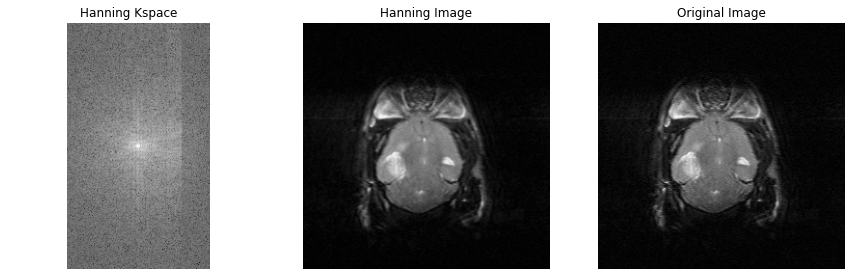

In [13]:
ks = np.zeros((4,np.shape(k_space_file)[1],np.shape(k_space_file)[2]), dtype=complex)
ks[:,:,:] = k_space_file[ind:ind+4,:,:]
print(ks.shape)
[hanning_im, hanning_k_space] = MRD.hanning_filter(ks3d=ks) 

plt.figure(figsize=(15, 15))
# Plot Hanning Filter 
print('Hanning Filter')
plt.subplot(131)
plt.title("Hanning Kspace ")
plt.imshow(np.log(abs(hanning_k_space[0,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Hanning Image")
plt.imshow(hanning_im[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

##   Apply Noise 

Noisy Image
Noisy Image


(-0.5, 255.5, 255.5, -0.5)

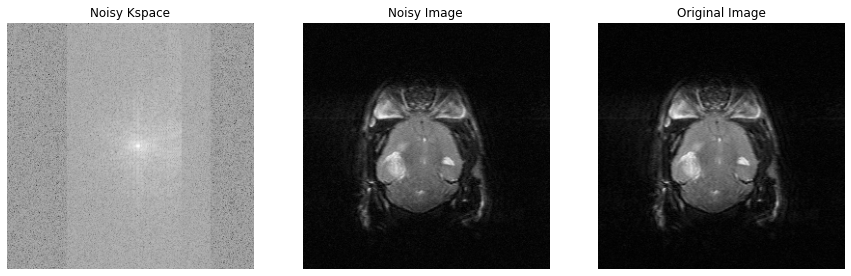

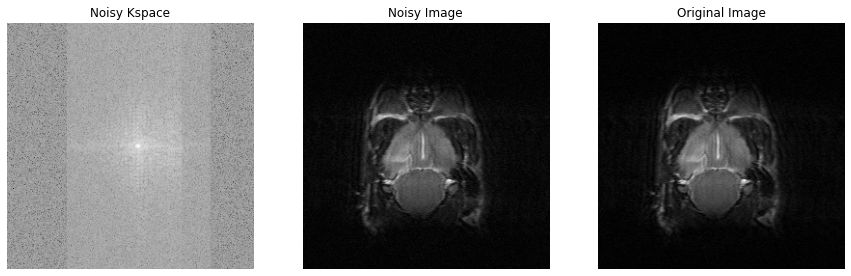

In [14]:

[noisy_im, k_space_noisy] = MRD.add_noise_artifacts(ks3d=ks)

# Plot Noisy Image 
plt.figure(figsize=(15, 15))
print('Noisy Image')
plt.subplot(131)
plt.title("Noisy Kspace")
plt.imshow(np.log(abs(k_space_noisy[0,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Noisy Image")
plt.imshow(noisy_im[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

# Plot Noisy Image 
plt.figure(figsize=(15, 15))
print('Noisy Image')
plt.subplot(131)
plt.title("Noisy Kspace")
plt.imshow(np.log(abs(k_space_noisy[1,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Noisy Image")
plt.imshow(noisy_im[1,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind+1,:,:]), cmap='gray')
plt.axis('off')

## Apply  Motion Artifact

5.12
Motion Artifact
Motion Artifact


<ipython-input-15-44cd8baa2d3f>:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_motion[0,:,:])), cmap='gray')
<ipython-input-15-44cd8baa2d3f>:25: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_motion[1,:,:])), cmap='gray')


(-0.5, 255.5, 255.5, -0.5)

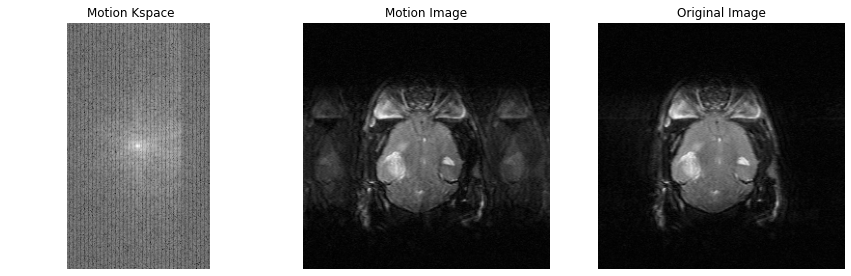

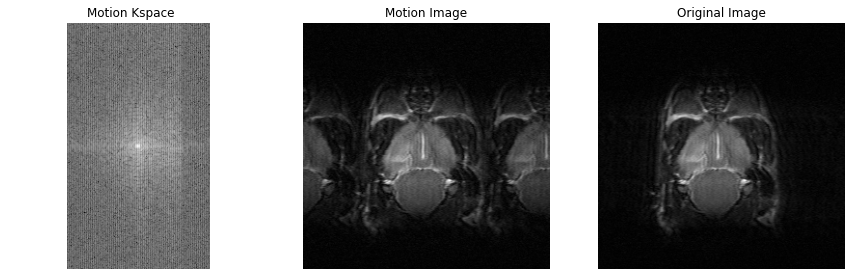

In [15]:

[motion_im, k_space_motion, test] = MRD.add_motion_artifacts(ks3d=ks)
print(test)

# Plot Motion Artifact 
plt.figure(figsize=(15, 15))
print('Motion Artifact')
plt.subplot(131)
plt.title("Motion Kspace")
plt.imshow(np.log(abs(k_space_motion[0,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Motion Image")
plt.imshow(motion_im[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

# Plot Motion Artifact 
plt.figure(figsize=(15, 15))
print('Motion Artifact')
plt.subplot(131)
plt.title("Motion Kspace")
plt.imshow(np.log(abs(k_space_motion[1,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Motion Image")
plt.imshow(motion_im[1,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind+1,:,:]), cmap='gray')
plt.axis('off')

# SNR

In [74]:
# create Mask
def create_mask(image=None):
    from skimage.filters import threshold_multiotsu
    # Applying multi-Otsu threshold for the default value, generating
    # three classes.
    thresholds = threshold_multiotsu(image,classes=2)
    # Using the threshold values, we generate the three regions.
    regions = np.digitize(x=image, bins=thresholds)
    bw = np.array(regions)
    return bw

In [75]:
# BW struct Boundaries
def create_boundaries(bw=None):
    count = 0
    boundarie = np.empty(shape=[bw.shape[0]*bw.shape[1], 2], dtype=int)
    for x in range(0,bw.shape[0]):
        for y in range(0,bw.shape[1]):
            if bw[x,y] == 1:
                boundarie[count,0] = x
                boundarie[count,1] = y    
                count += 1
    boundaries = boundarie[1:count,:]
    return boundaries


In [76]:
# calculate SNR 
# image: 2D matrix
def get_snr(image=None, rescale=0.5):
    snr = []
    # find the image size
    size_x = image.shape[0]
    size_y = image.shape[1]
    # create the object mask
    bw = create_mask(image=image) 
    bw[bw > 0] = 1    
    # removing small objects
    selem =  morphology.disk(2)
    res = morphology.white_tophat(bw, selem)
    bw = bw - res
    # create the boundaries of the object mask   
    boundaries = create_boundaries(bw)
    # find the limits of the object
    min_x = min(boundaries[:,0])
    min_y = min(boundaries[:,1]) 
    maxX = max(boundaries[:,0])
    maxY = max(boundaries[:,1])
    if min_y < 10:
        min_y = 10
    if min_x < 10:
        min_x = 10
    
    # Calculate the mean of the signal (only signal, without noise)
    im_signal = np.multiply(image,bw)
    signal = im_signal.flatten() 
    signal = signal[signal != 0]
    mean_signal = np.mean(signal)
    
    # find the noise regions
    # Noise: create four rectangles on the four corners    
    size_rect = np.ones(2, dtype=int)
    size_rect = np.multiply([min_x, min_y], rescale)
    size_rect = np.round(size_rect)
    if size_rect[0] < 10: 
        size_rect[0] = 10
    if size_rect[1] < 10: 
        size_rect[1] = 10
    if size_rect[0] > size_x/4: 
        size_rect[0] = size_x/4
    if size_rect[1] > size_y/4: 
        size_rect[1] = size_y/4
    size_rect = size_rect.astype(int)
    
    mask_noise = np.zeros(shape=[size_x, size_y])    
    rect = np.ones(shape=(size_rect[0], size_rect[1]), dtype=int)
    mask_noise[0:size_rect[0],0:size_rect[1]] = rect
    mask_noise[size_x-size_rect[0]:size_x,0:size_rect[1]] = rect
    mask_noise[0:size_rect[0],size_y-size_rect[1]:size_y] = rect
    mask_noise[size_x-size_rect[0]:size_x,size_y-size_rect[1]:size_y] = rect
  
    # maskS = bw
    mask_noise[mask_noise > 0] = 1
    mask_noise[mask_noise <= 0] = 0
    im_noise = np.multiply(image,mask_noise)    
    noise = im_noise.flatten() 
    noise = noise[noise != 0]
    std_noise = np.std(noise)

    snr = mean_signal/std_noise
    
    return snr, bw ,mask_noise

In [78]:
# call SNR7 function 
ind = 11
im_test1 = abs(im_file[ind,:,:])
[snr, bw ,mask_noise] = get_snr(image=im_test1,rescale=0.8)

plt.subplot(121)
plt.title('Original image')
plt.imshow(im_test1, cmap='gray')
plt.axis('off')

bw[bw == 1] = 2
plt.subplot(122)
plt.title('SNR: '+ str(snr))
plt.imshow(bw+mask_noise, cmap='gray')
plt.axis('off')




NameError: name 'morphology' is not defined

In [80]:
for i in im_file:
    print(i.shape)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


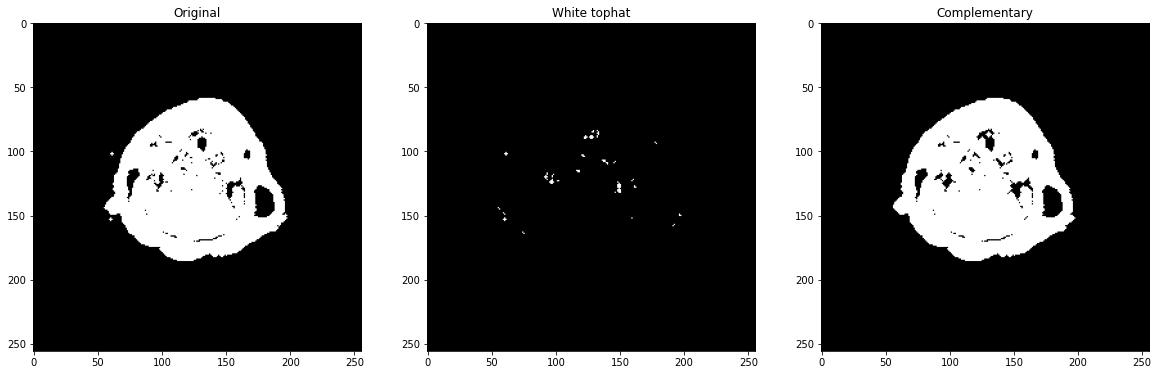

In [63]:

from skimage import data
from skimage import color, morphology

selem =  morphology.disk(2)
res = morphology.white_tophat(bw, selem)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(bw, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(bw - res, cmap='gray')

plt.show()

# Blurry

In [48]:
blurry_data=[]
print(k_space_file.shape)
def preprocessing():
    [low_im, low_k_space, radium] = MRD.add_low_pass_filter_artifacts(ks3d=k_space_file)
    return low_im 

(49, 256, 256)


In [59]:
blurry_data = preprocessing()
blurry_dataset = np.array(blurry_data)
print(blurry_dataset.shape)

print(type(im_file))

(49, 256, 256)
<class 'numpy.ndarray'>


(49, 256, 256)


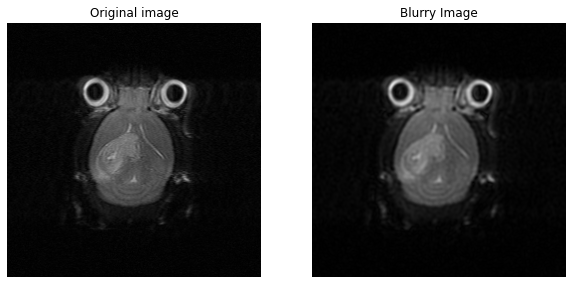

In [72]:
blurry_data = preprocessing()
blurry_dataset = np.array(blurry_data)

ind = 1
print(blurry_dataset.shape)


fig = plt.figure(figsize=(10,11))
plt.subplot(121)
plt.title('Original image')
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Blurry Image')
plt.imshow(blurry_data[ind,:,:], cmap='gray')
plt.axis('off')



plt.show()